# Machine Learning

# Machine learning is a field of stuty that gives computers the ability to learn without being explicitly programmed

# Logistic Regression
#delimiter=default for csv is "," --> ' *,* ' special type of delimeter to allow the leaving the space around 
#the missing value and detect the missing value correctly
#if the special character present in numerical datatype the the entire datatype will change hence these will not 
#present.There will be blanks only and in character we can get the special character.
#replace =true it will work fast rather to assign the value and run

# steps for creating model in classification Algorithms:-
#1. Create a dataframe -->pd.read_csv(), pd.read_excel()
#2. preprocessing the data:- 
        #a. feature selection,handling the outlier(not mendetory),missing data(because sklearn wont allow u 
          #to create a model with missing value)
#3. Converting categorical data to numerical--> get_dummies()-->[if we have less number of data],
            #OneHotEncoder(),LabelEncoder()--> it gives number to data inaccending order.
#4. Create X and Y--> x=df.values[:,:-1]
                    # y=df.values[:,-1]
#5. Scaling the data-->MinMaxScaler(), StandardScaler()
#6. Splitting the data into train and test--> train_test_split()
#7. Build the model:
        #a. Create a model object-->obj=AlgoName()
        #b. Training the model-->obj.fit(x_train,y_train)
        #c. use the model-->y_pred=obj.predict(x_test)
#8.Evaluating the model:-
    #a. Confusion_matrix(y_test,y_pred)
    #b. accuracy_score()
    #c. classification_report()
#9. Tuning the model
        #using threshold value (0.5)

In [74]:
import pandas as pd
import numpy as np

In [75]:
adult_df = pd.read_csv(r'D:\MAMTA\Data Set\python\adult_data.csv', header = None,delimiter=' *, * ',engine='python')
adult_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [76]:
pd.set_option('display.max_column', None)
#pd.set_option('display.max_rows',None)
adult_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [77]:
adult_df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
'marital_status', 'occupation', 'relationship',
'race', 'sex', 'capital_gain', 'capital_loss',
'hours_per_week', 'native_country', 'income']

adult_df.head()



,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [78]:
adult_df.isnull().sum()   #we have missing value in ?mark so "0" we get

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [79]:
adult_df=adult_df.replace(['?'],np.nan)  #it is passed in list,if we have multiple types of missing value we can 
adult_df.isnull().sum()                 #pass it in list using replace keyword

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [80]:
#create a copy of the dataframe
adult_df_rev= pd.DataFrame.copy(adult_df)

#adult_df_rev.describe(include='all')


In [81]:
adult_df_rev=adult_df_rev.drop(["education","fnlwgt"],axis=1)

In [82]:
adult_df_rev.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [83]:
#replace the missing values with values in the top rows of each column
for value in['workclass','occupation','native_country']:
    adult_df_rev[value].fillna(adult_df_rev[value].mode()[0],inplace=True)

In [84]:
adult_df_rev.workclass.mode()
#adult_df_rev.occupation.mode()
#adult_df_rev.native_country()

0    Private
dtype: object

In [85]:
adult_df_rev.isnull().sum()
#adult_df_rev.head()

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [86]:
#Generic code for treating missing value
"""
for x in adult_df_rev.columns[:]:
    if adult_df_rev[x].dtype=='object':
        adult_df_rev[x].fillna(adult_df_rev[x].mode()[0],inplace=True)
    elif adult_df_rev[x].dtype=='int64'| adult_df_rev[x].dtype=='float64':
        adult_df_rev[x].fillna(adult_df_rev[x].mean(),inplace=True)
"""

#"""
for x in adult_df_rev.columns[:]:
    if adult_df_rev[x].dtype=='object':
        adult_df_rev[x].fillna(adult_df_rev[x].mode()[0],inplace=True)

    elif adult_df_rev[x].dtype in('int64','float64'):
        adult_df_rev[x].fillna(adult_df_rev[x].mean(),inplace=True)


#"""

In [87]:
adult_df_rev.workclass.value_counts() #unique values in variable

Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [88]:
adult_df_rev.native_country.value_counts()

United-States                 29753
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France                      

In [89]:
colname=[]
for x in adult_df_rev.columns[:]:
    if adult_df_rev[x].dtype=='object':
        colname.append(x)
        
colname
    

['workclass',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [90]:
"""colname=['workclass','marital_status','occupation','relationship','race','sex','native_country', 'income']
colname
"""

"colname=['workclass','marital_status','occupation','relationship','race','sex','native_country', 'income']\ncolname\n"

# Data Processing

In [91]:
#for precosssing the data
#to convert categorical into numberic using label encoding
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

for x in colname:
    adult_df_rev[x]=le.fit_transform(adult_df_rev[x])  #fit_transfer is used to label the levels in variable
    #fit is used to create the dictionery object in the memory and the store the numeric value
    # against each category 
    #then transform will convert the original categ. from the variable to the numeric value.

In [92]:
adult_df_rev.head()

#0--> <=50K
#1--> >50K

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,6,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,13,2,3,0,4,1,0,0,13,38,0
2,38,3,9,0,5,1,4,1,0,0,40,38,0
3,53,3,7,2,5,0,2,1,0,0,40,38,0
4,28,3,13,2,9,5,2,0,0,0,40,4,0


In [93]:
#segregation of Data:-
#x=Independent variable =[:,:-1]  till -2
#y=Dependent Variable  =[:,-1] -1 for last column

In [94]:
adult_df_rev.dtypes

age               int64
workclass         int32
education_num     int64
marital_status    int32
occupation        int32
relationship      int32
race              int32
sex               int32
capital_gain      int64
capital_loss      int64
hours_per_week    int64
native_country    int32
income            int32
dtype: object

In [95]:
X= adult_df_rev.values[:,:-1]
Y= adult_df_rev.values[:,-1]

In [96]:
type(X)

numpy.ndarray

# Scaling

In [97]:
#Scaling the data
#1.Normalization :- MinMaxScaler()-->0 to 1
                #x-x(min)/x(max)-x(min)
#2.Standardization :- StandardScaler()--> it tries to follow the variable normal distribution(z)
                # Imparical rule (3 category 99,95,90)
    #range=(-3 to 3)

In [98]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X= scaler.transform(X)
print(X)

[[ 0.03067056  2.62429763  1.13473876 ... -0.21665953 -0.03542945
   0.26136999]
 [ 0.83710898  1.72109965  1.13473876 ... -0.21665953 -2.22215312
   0.26136999]
 [-0.04264203 -0.08529633 -0.42005962 ... -0.21665953 -0.03542945
   0.26136999]
 ...
 [ 1.42360965 -0.08529633 -0.42005962 ... -0.21665953 -0.03542945
   0.26136999]
 [-1.21564337 -0.08529633 -0.42005962 ... -0.21665953 -1.65522476
   0.26136999]
 [ 0.98373415  0.81790166 -0.42005962 ... -0.21665953 -0.03542945
   0.26136999]]


C:\Users\Mamta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Mamta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [99]:
#np.set_printoptions(threshold=np.inf)


In [100]:
Y = Y.astype(int)

# Spliting of Data

In [101]:
#test and train data
#1.Based on condition
#2.Based on number of obsevation[70:30] -->(not much suitable)
#3.Random sampling-->train_test_split()

In [102]:
from sklearn.model_selection import train_test_split

#split the data into test and train
#order of variable would be unchanged
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=10)
print(X)
print(Y)

[[ 0.03067056  2.62429763  1.13473876 ... -0.21665953 -0.03542945
   0.26136999]
 [ 0.83710898  1.72109965  1.13473876 ... -0.21665953 -2.22215312
   0.26136999]
 [-0.04264203 -0.08529633 -0.42005962 ... -0.21665953 -0.03542945
   0.26136999]
 ...
 [ 1.42360965 -0.08529633 -0.42005962 ... -0.21665953 -0.03542945
   0.26136999]
 [-1.21564337 -0.08529633 -0.42005962 ... -0.21665953 -1.65522476
   0.26136999]
 [ 0.98373415  0.81790166 -0.42005962 ... -0.21665953 -0.03542945
   0.26136999]]
[0 0 0 ... 0 0 1]


# Model Building

In [103]:
from sklearn.linear_model import LogisticRegression
#create a model object
classifier=LogisticRegression()
#fitting training data to the model
classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test)
#print(list(zip(y_test,Y_pred)))

print(classifier.coef_)   #B1,B2..
print(classifier.intercept_)  #B0

[[ 0.47898827 -0.10448293  0.86285082 -0.3481469  -0.0165719  -0.18074806
   0.11569239  0.42805994  2.4277355   0.28594931  0.37942052  0.00878949]]
[-1.50131013]


C:\Users\Mamta\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [104]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("classification report:")
print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model:",acc) 

[[7017  406]
 [1316 1030]]
classification report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7423
           1       0.72      0.44      0.54      2346

   micro avg       0.82      0.82      0.82      9769
   macro avg       0.78      0.69      0.72      9769
weighted avg       0.81      0.82      0.81      9769

Accuracy of the model: 0.8237281195618794


In [105]:
#confusion matrix:-

                    #predict -ve       predict +ve
# -ve case(0)        true negative    false positive
# +ve caase(1)       false negative   ture positive

#Accuracy_score=  TN+TP/TN+TP+FP+FN


In [106]:
#classification report:
 #             precision    recall  f1-score   support
#
 #          0       0.84      0.95      0.89      7423
  #         1       0.72      0.44      0.54      2346
#recall--> row wise calculation (actual value)
#how manny -ve cases did we catch ?
#1.class 0 (specificity) TNR= TN/TN+FP=0.95

#how many +ve cases did we catch ?
#2. class 1 (sensitivity) TPR=TP/TP+FN=0.44

#precision:- column wise calculation (prediction value)
#1. class 0:- how mayn of the -ve prediction were correct ?
        # TN/TN+FN = 0.84
    
# class 1:- how many of the +ve prediction were correct ?
        # TP/TP+FP = 0.72
    
#f1_score: 2*(precision*recall)/(prec+recall)
#if we have multiple classes then we see the f1_score(evaluation matrix because it is a combination of recall and preci)
#it is a harmonic mean of both (recall and precision) of classes


In [107]:
#SMOTE (to blance the data)
#1. UP sampling:- in this the unbalace class repeate the variable to equal.
#2.Down sampling:- 
#Type I error: negative of objective which we are looking for is called Type I error . it is fairly exceptable 
        #in industry.(False Positive)
#type II error: not acceptable in industry.(False Negative)

# Adjusting the Threshold

In [108]:
# store the predicted probabilities
#proba is used to calculate prediction on basis of threshold which we decide
#without proba it only predict or calculate on basis of default threshold(.5)
y_pred_prob = classifier.predict_proba(X_test)
print(y_pred_prob)

[[0.96860653 0.03139347]
 [0.97030158 0.02969842]
 [0.23862252 0.76137748]
 ...
 [0.81402337 0.18597663]
 [0.82524908 0.17475092]
 [0.1567879  0.8432121 ]]


In [109]:
#try to rduce the type II error and improvising the type I error(increase)
# threshold changed to 0.45.. from 0.5
y_pred_class=[]
for value in y_pred_prob[:,1]:   #1st index column
    if value > 0.46:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
print(y_pred_class)

[0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 

In [110]:
#Generic code to get the threshold value..*
for a in np.arange(0,1,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :", 
        cfm[1,0]," , type 1 error:", cfm[0,1])


Errors at threshold  0.0 : 7423  , type 2 error : 0  , type 1 error: 7423
Errors at threshold  0.01 : 7068  , type 2 error : 0  , type 1 error: 7068
Errors at threshold  0.02 : 6498  , type 2 error : 7  , type 1 error: 6491
Errors at threshold  0.03 : 5951  , type 2 error : 24  , type 1 error: 5927
Errors at threshold  0.04 : 5508  , type 2 error : 45  , type 1 error: 5463
Errors at threshold  0.05 : 5137  , type 2 error : 66  , type 1 error: 5071
Errors at threshold  0.06 : 4840  , type 2 error : 92  , type 1 error: 4748
Errors at threshold  0.07 : 4535  , type 2 error : 106  , type 1 error: 4429
Errors at threshold  0.08 : 4261  , type 2 error : 122  , type 1 error: 4139
Errors at threshold  0.09 : 4053  , type 2 error : 138  , type 1 error: 3915
Errors at threshold  0.1 : 3865  , type 2 error : 158  , type 1 error: 3707
Errors at threshold  0.11 : 3688  , type 2 error : 170  , type 1 error: 3518
Errors at threshold  0.12 : 3509  , type 2 error : 190  , type 1 error: 3319
Errors at t

In [111]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cfm=confusion_matrix(Y_test,y_pred_class)
print(cfm)

print("classification report:")
print(classification_report(Y_test,y_pred_class))

acc=accuracy_score(Y_test,y_pred_class)
print("Accuracy of the model:",acc)
print(classification_report(Y_test,y_pred_class))

[[6910  513]
 [1208 1138]]
classification report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      7423
           1       0.69      0.49      0.57      2346

   micro avg       0.82      0.82      0.82      9769
   macro avg       0.77      0.71      0.73      9769
weighted avg       0.81      0.82      0.81      9769

Accuracy of the model: 0.8238304841846658
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      7423
           1       0.69      0.49      0.57      2346

   micro avg       0.82      0.82      0.82      9769
   macro avg       0.77      0.71      0.73      9769
weighted avg       0.81      0.82      0.81      9769



In [112]:
#working on threshold-->0.46
from sklearn import metrics

fpr, tpr,z = metrics.roc_curve(Y_test, y_pred_class)
auc = metrics.auc(fpr,tpr)
print(auc)
print(fpr)
print(tpr)
print(z)

0.7079857322331378
[0.         0.06910952 1.        ]
[0.         0.48508099 1.        ]
[2 1 0]


In [113]:
#Range for AUC
#0.5-6--> poor model
#0.6-0.7--> bad model
#0.7-0.8-->goog
#0.8-0.9-->very good
#0.9-1.0--> Excellent

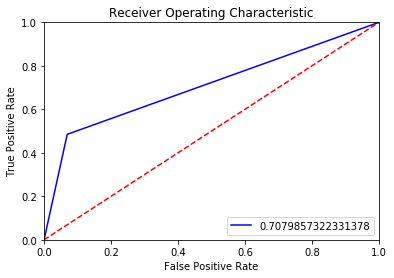

In [114]:
#matplotlib--> Data visualization

import matplotlib.pyplot as plt
#%matplotlib inline                    
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [115]:
#by replacing the y_pred_class to y_pred_prob
#working on combination of threshold (z)

from sklearn import metrics

fpr, tpr,z = metrics.roc_curve(Y_test, y_pred_prob[:,1])
auc = metrics.auc(fpr,tpr)
print(auc)
print(fpr)
print(tpr)
print(z)

0.8510128825880344
[0.         0.         0.         ... 0.99555436 0.99582379 1.        ]
[0.00000000e+00 8.52514919e-04 2.55754476e-03 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]
[2.00000000e+00 1.00000000e+00 1.00000000e+00 ... 3.10225942e-03
 3.09956648e-03 6.46531577e-04]


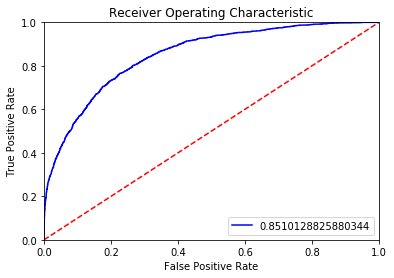

In [116]:
import matplotlib.pyplot as plt
%matplotlib inline                    
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [117]:
#CROSS VALIDATION...*

In [118]:
classifier=(LogisticRegression())

#performing kfold_cross_validation
from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=10)
print(kfold_cv)

from sklearn.model_selection import cross_val_score    #perform the iteration
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,
y=Y_train, cv=kfold_cv)
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())



KFold(n_splits=10, random_state=None, shuffle=False)


C:\Users\Mamta\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mamta\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mamta\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mamta\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mamta\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

[0.81842105 0.81403509 0.81790259 0.85037297 0.82974989 0.82492321
 0.80824923 0.8174638  0.83106626 0.82843352]
0.8240617614681722


In [119]:
#Create model with cross validation.

for train_value, test_value in kfold_cv.split(X_train):
    classifier.fit(X_train[train_value], Y_train[train_value]).predict(X_train[test_value])


Y_pred=classifier.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

C:\Users\Mamta\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mamta\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mamta\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mamta\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Mamta\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [120]:
#Y_pred--. crossvalidation

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("classification report:")
print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model:",acc)
print(classification_report(Y_test,Y_pred))

[[7016  407]
 [1315 1031]]
classification report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7423
           1       0.72      0.44      0.54      2346

   micro avg       0.82      0.82      0.82      9769
   macro avg       0.78      0.69      0.72      9769
weighted avg       0.81      0.82      0.81      9769

Accuracy of the model: 0.8237281195618794
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7423
           1       0.72      0.44      0.54      2346

   micro avg       0.82      0.82      0.82      9769
   macro avg       0.78      0.69      0.72      9769
weighted avg       0.81      0.82      0.81      9769



In [121]:
classifier.intercept_

array([-1.4916653])

In [122]:
classifier.coef_

array([[ 0.47588789, -0.10662058,  0.8557745 , -0.34744954, -0.01795583,
        -0.17310727,  0.11368567,  0.42713232,  2.41566051,  0.29025468,
         0.38324186,  0.00732808]])

In [123]:
#Recursive Feature Selection
#RFE Selection method: most of the time the inbuild fuction drop the logically important variable

In [124]:
colname=adult_df_rev.columns[:]
 
from sklearn.feature_selection import RFE
rfe = RFE(classifier, 12)
model_rfe = rfe.fit(X_train, Y_train)
print("Num Features: ",model_rfe.n_features_)
print("Selected Features: ")
print(list(zip(colname, model_rfe.support_)))
print("Feature Ranking: ", model_rfe.ranking_)
 
Y_pred=model_rfe.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

Num Features:  12
Selected Features: 
[('age', True), ('workclass', True), ('education_num', True), ('marital_status', True), ('occupation', True), ('relationship', True), ('race', True), ('sex', True), ('capital_gain', True), ('capital_loss', True), ('hours_per_week', True), ('native_country', True)]
Feature Ranking:  [1 1 1 1 1 1 1 1 1 1 1 1]


C:\Users\Mamta\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [125]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("classification report:")
print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model:",acc)
print(classification_report(Y_test,Y_pred))

[[7017  406]
 [1316 1030]]
classification report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7423
           1       0.72      0.44      0.54      2346

   micro avg       0.82      0.82      0.82      9769
   macro avg       0.78      0.69      0.72      9769
weighted avg       0.81      0.82      0.81      9769

Accuracy of the model: 0.8237281195618794
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7423
           1       0.72      0.44      0.54      2346

   micro avg       0.82      0.82      0.82      9769
   macro avg       0.78      0.69      0.72      9769
weighted avg       0.81      0.82      0.81      9769



In [126]:
#
"""new_data=adult_df_rev[['age','workclass','occupation','race','sex','income']]
new_data.head()
new_X=new_data.values[:,:-1]
new_Y=new_data.values[:,-1]
print(new_X)
print(new_Y)
"""

"new_data=adult_df_rev[['age','workclass','occupation','race','sex','income']]\nnew_data.head()\nnew_X=new_data.values[:,:-1]\nnew_Y=new_data.values[:,-1]\nprint(new_X)\nprint(new_Y)\n"

# Univariate Selection

In [133]:
X = adult_df_rev.values[:,:-1]
Y = adult_df_rev.values[:,-1]


In [134]:
#Univariate selection Method
colname=adult_df_rev.columns[:]
 

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
test = SelectKBest(score_func=chi2, k=10)
fit1 = test.fit(X, Y)

print(fit1.scores_)
print(list(zip(colname,fit1.get_support())))
X = fit1.transform(X)

print(X)

[8.60061182e+03 9.35436386e-02 2.40142178e+03 1.12346982e+03
 1.00356439e+02 3.65914312e+03 3.30313051e+01 5.02439419e+02
 8.21924671e+07 1.37214589e+06 6.47640900e+03 1.74341889e+01]
[('age', True), ('workclass', False), ('education_num', True), ('marital_status', True), ('occupation', True), ('relationship', True), ('race', True), ('sex', True), ('capital_gain', True), ('capital_loss', True), ('hours_per_week', True), ('native_country', False)]
[[   39    13     4 ...  2174     0    40]
 [   50    13     2 ...     0     0    13]
 [   38     9     0 ...     0     0    40]
 ...
 [   58     9     6 ...     0     0    40]
 [   22     9     4 ...     0     0    20]
 [   52     9     2 ... 15024     0    40]]


In [135]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)

X= scaler.transform(X)
print(X)

[[ 0.03067056  1.13473876  0.92163395 ...  0.1484529  -0.21665953
  -0.03542945]
 [ 0.83710898  1.13473876 -0.4062122  ... -0.14592048 -0.21665953
  -2.22215312]
 [-0.04264203 -0.42005962 -1.73405835 ... -0.14592048 -0.21665953
  -0.03542945]
 ...
 [ 1.42360965 -0.42005962  2.24948009 ... -0.14592048 -0.21665953
  -0.03542945]
 [-1.21564337 -0.42005962  0.92163395 ... -0.14592048 -0.21665953
  -1.65522476]
 [ 0.98373415 -0.42005962 -0.4062122  ...  1.88842434 -0.21665953
  -0.03542945]]


C:\Users\Mamta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Mamta\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [136]:
from sklearn.model_selection import train_test_split

#split the data into test and train
#order of variable would be unchanged
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=10)
print(X)
print(Y)

[[ 0.03067056  1.13473876  0.92163395 ...  0.1484529  -0.21665953
  -0.03542945]
 [ 0.83710898  1.13473876 -0.4062122  ... -0.14592048 -0.21665953
  -2.22215312]
 [-0.04264203 -0.42005962 -1.73405835 ... -0.14592048 -0.21665953
  -0.03542945]
 ...
 [ 1.42360965 -0.42005962  2.24948009 ... -0.14592048 -0.21665953
  -0.03542945]
 [-1.21564337 -0.42005962  0.92163395 ... -0.14592048 -0.21665953
  -1.65522476]
 [ 0.98373415 -0.42005962 -0.4062122  ...  1.88842434 -0.21665953
  -0.03542945]]
[0 0 0 ... 0 0 1]


In [137]:
from sklearn.linear_model import LogisticRegression
#create a model object
classifier=LogisticRegression()
#fitting training data to the model
classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test)
#print(list(zip(y_test,Y_pred)))

print(classifier.coef_)   #B1,B2..
print(classifier.intercept_)  #B0

[[ 0.47398069  0.86185407 -0.34891618 -0.0154889  -0.17867913  0.11048446
   0.41874145  2.42840713  0.28697785  0.37157867]]
[-1.49444986]


C:\Users\Mamta\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [138]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("classification report:")
print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model:",acc) 

[[7018  405]
 [1318 1028]]
classification report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7423
           1       0.72      0.44      0.54      2346

   micro avg       0.82      0.82      0.82      9769
   macro avg       0.78      0.69      0.72      9769
weighted avg       0.81      0.82      0.81      9769

Accuracy of the model: 0.8236257549390931


# Variance Based Selection

In [144]:
X = adult_df_rev.values[:,:-1]
Y = adult_df_rev.values[:,-1]

In [159]:
from sklearn.feature_selection import VarianceThreshold


vt = VarianceThreshold(0.3)
fit1 = vt.fit(X, Y)
print(fit1.variances_)

features = fit1.transform(X)
print(features)
print(features.shape[1])
print(list(zip(colname,fit1.get_support())))

[1.86055686e+02 1.22584081e+00 6.61868663e+00 2.26863420e+00
 1.57819202e+01 2.58163360e+00 7.20448827e-01 2.21369502e-01
 5.45408641e+07 1.62371951e+05 1.52454313e+02 3.66745732e+01]
[[39  6 13 ...  0 40 38]
 [50  5 13 ...  0 13 38]
 [38  3  9 ...  0 40 38]
 ...
 [58  3  9 ...  0 40 38]
 [22  3  9 ...  0 20 38]
 [52  4  9 ...  0 40 38]]
11
[('age', True), ('workclass', True), ('education_num', True), ('marital_status', True), ('occupation', True), ('relationship', True), ('race', True), ('sex', False), ('capital_gain', True), ('capital_loss', True), ('hours_per_week', True), ('native_country', True)]
